In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from source.mfa.mfa import MFA
from source.mfa.mfa_utils import sample_from_mfa_and_plot, visualize_component, visualize_component_change, RUN_DIR, SAVED_GMM_FILE

# Factor Analysis based GMM

In [3]:
path_to_fa_model = "/home/konstantin/personal/OnGansAndGMMs/run/e1_fa_256_saved_gmm.pkl"

fa_gmm_model = MFA()
fa_gmm_model.load(path_to_fa_model)

# Sample from GMM (FA)

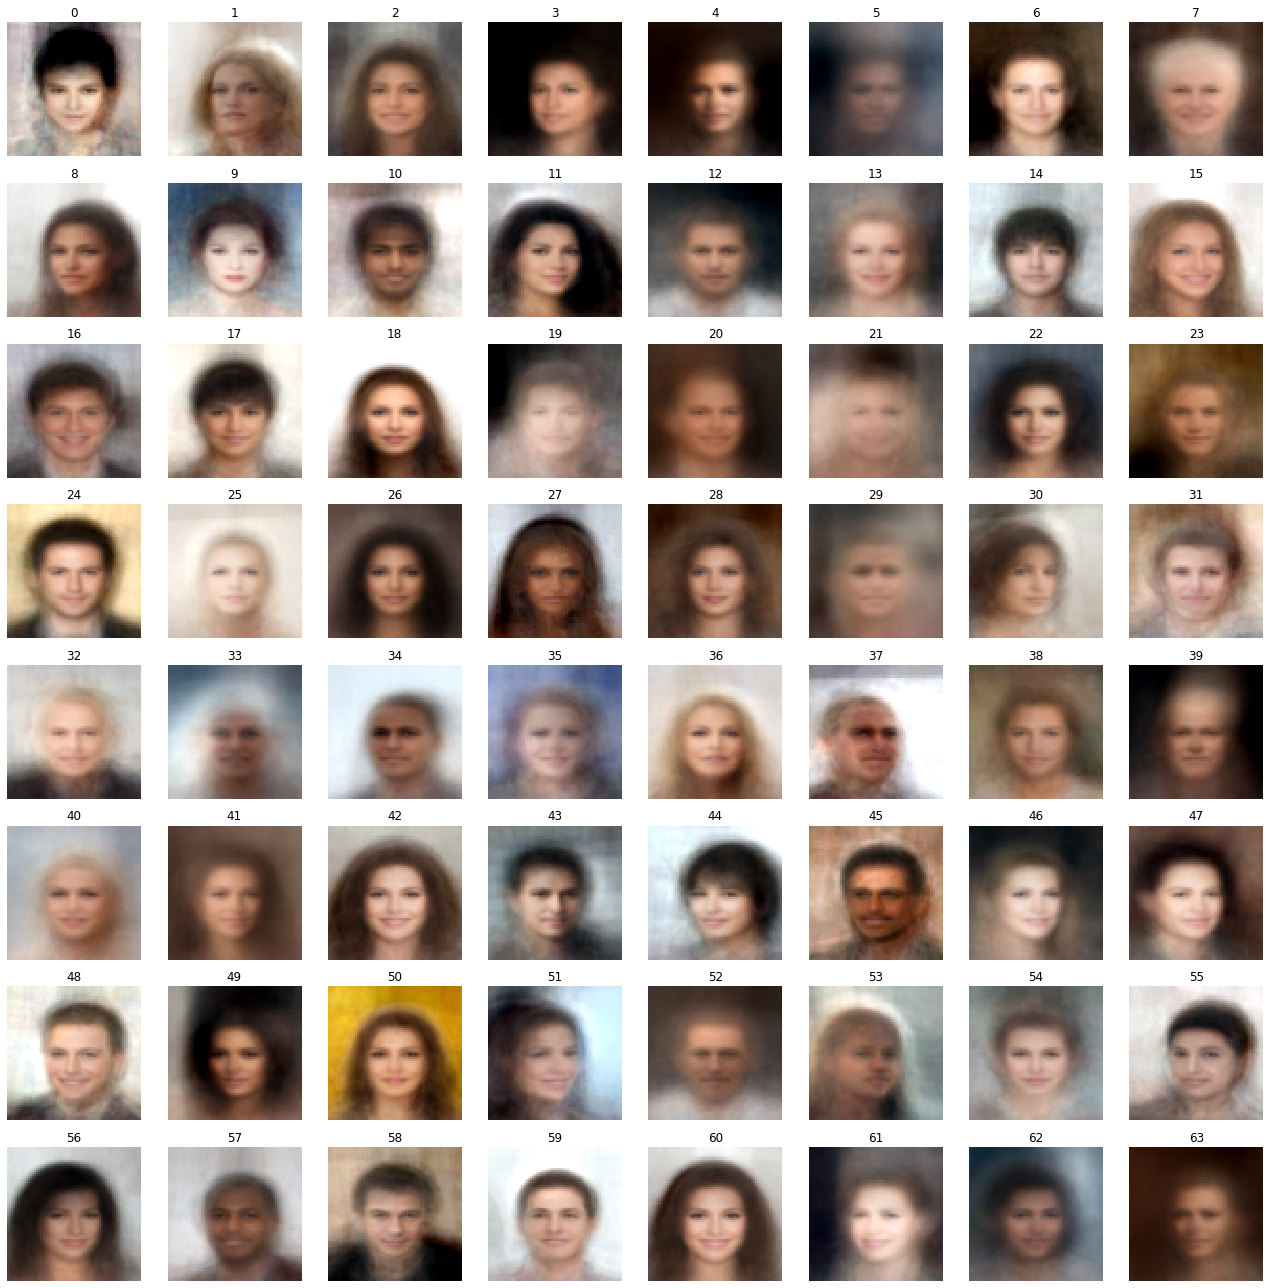

In [4]:
sample_from_mfa_and_plot(fa_gmm_model)

# Manifold disentanglement (FA)

## Visualization of 4 latent dimensions for 2 components

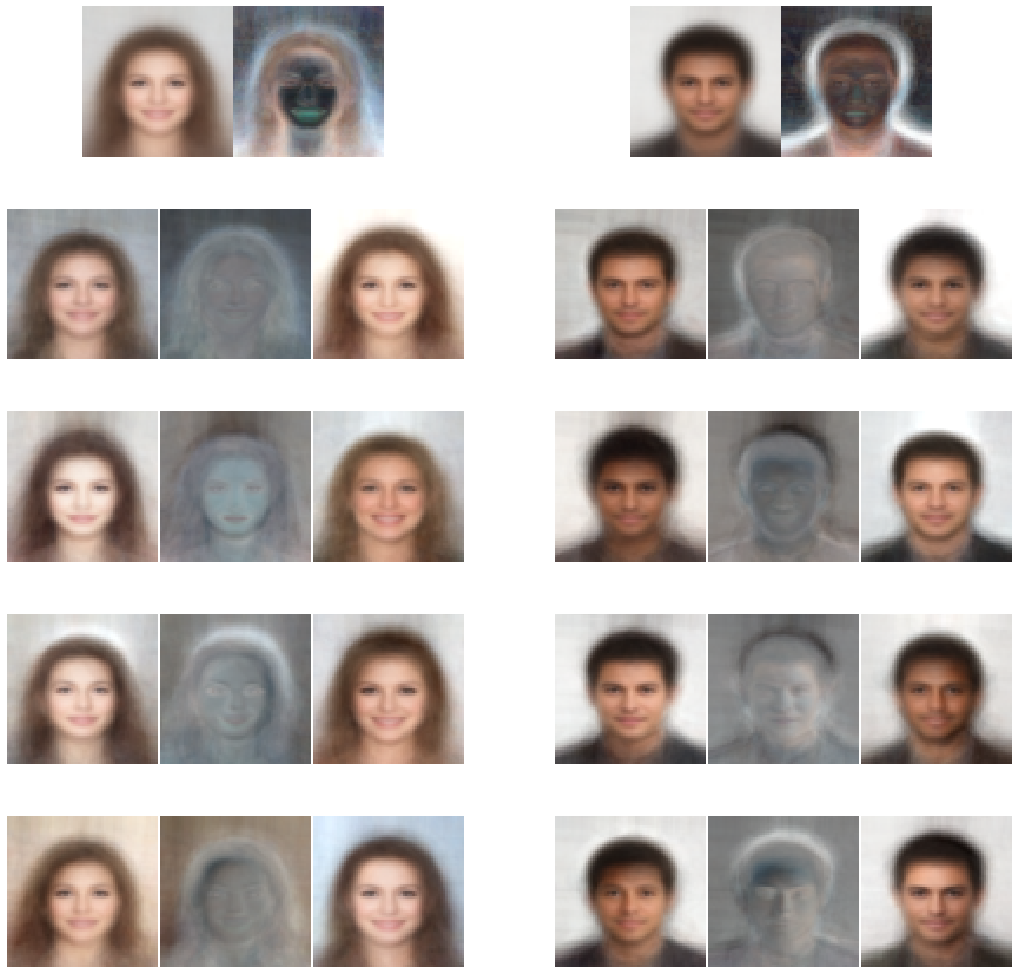

In [5]:
# 0, 31, 39, 41, 52, 55, 117, 133, 241, 242
visualize_component(fa_gmm_model, components=[0,241])

## Checking latent space directions

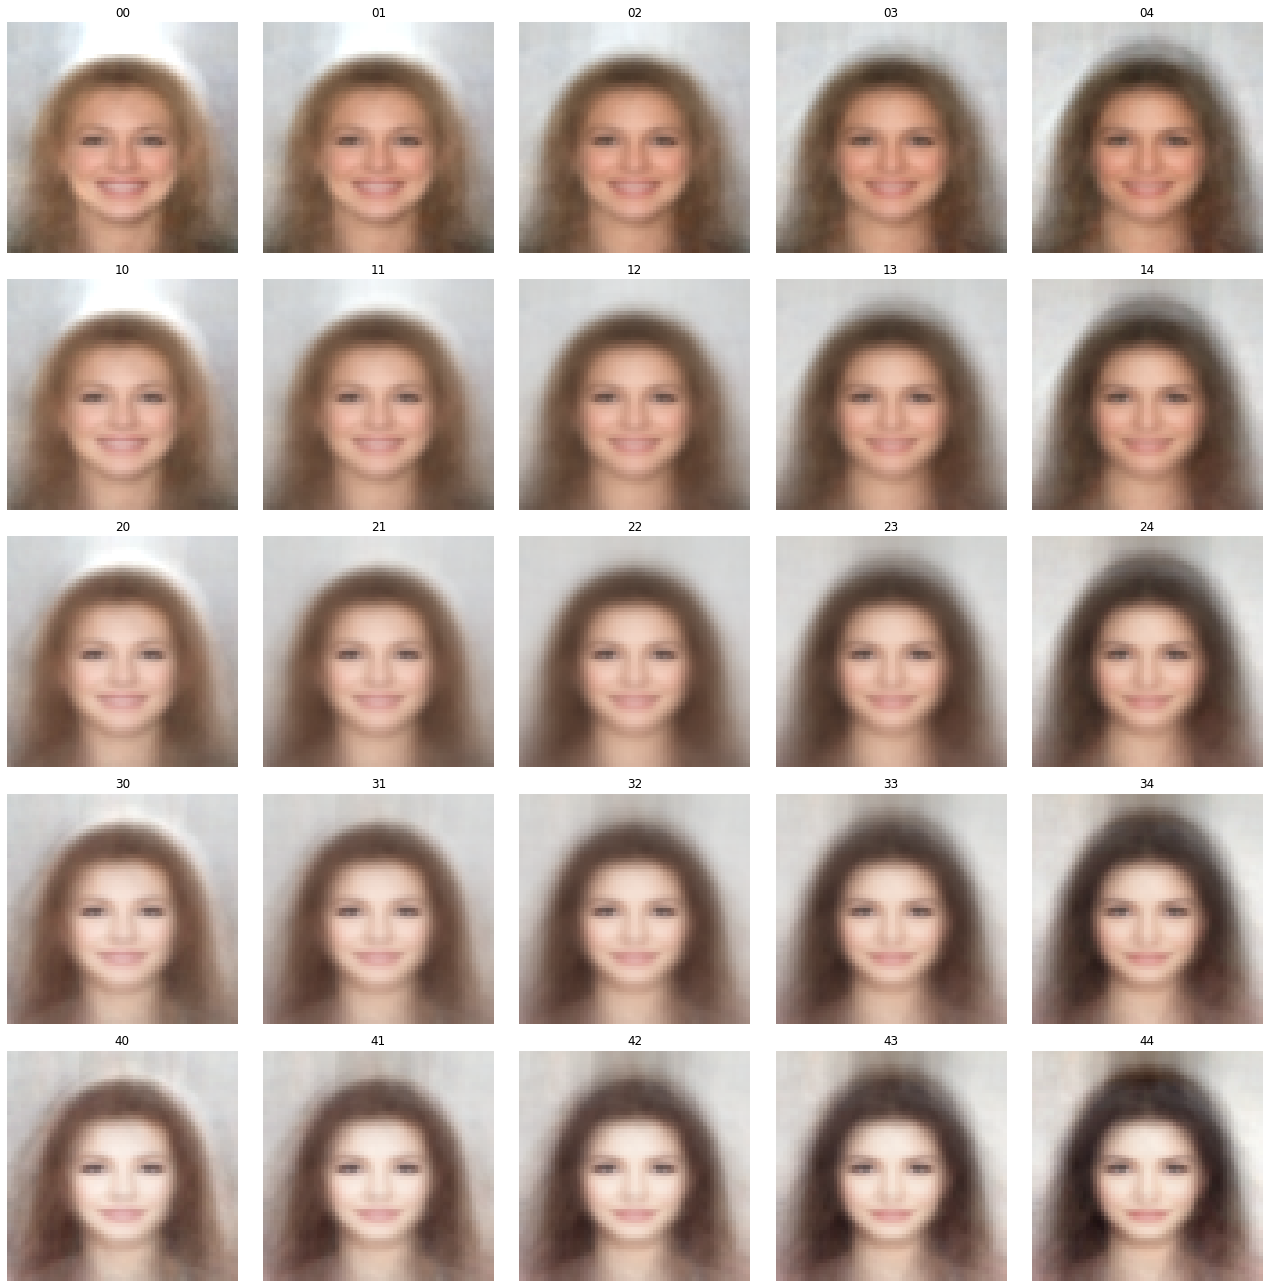

In [7]:
visualize_component_change(fa_gmm_model, [0,55], [1,3])

# NDB Test

In [4]:
from source.mfa.mfa_utils import get_random_samples
from source.ndb.NDB import NDB

In [5]:
num_train = 80000
num_test = 20000

dataset_root = "/home/konstantin/datasets"
train_samples = get_random_samples(dataset_root, num_train).detach().numpy()

In [6]:
ndb = NDB(train_samples, k_clusters=200)

In [7]:
test_samples = fa_gmm_model.draw_samples(num_test, False)

In [8]:
ndb.calculate(test_samples)

(0.15, 200)

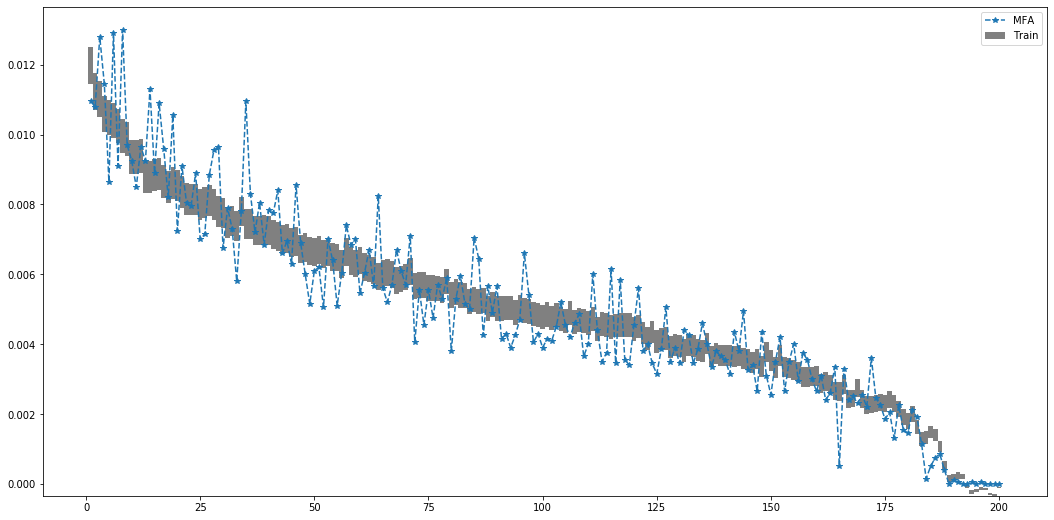

In [9]:
ndb.plot_hist([(test_samples, "MFA")])